<a href="https://colab.research.google.com/github/cs-devika/assignment_2/blob/main/asseseement_wns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
dataset = pd.read_csv("/content/train_LZdllcl.csv")
dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
dataset.shape


(54808, 14)

handling duplicates

In [6]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
54803,False
54804,False
54805,False
54806,False


null values

In [7]:
dataset.isnull().sum()


,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


replacing missing value


In [8]:
dataset['education'].fillna(dataset['education'].mode()[0],inplace=True)

/tmp/ipython-input-326834185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['education'].fillna(dataset['education'].mode()[0],inplace=True)


In [9]:
dataset.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [10]:
dataset['previous_year_rating'].fillna(dataset['previous_year_rating'].median(),inplace=True)

/tmp/ipython-input-2672018031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['previous_year_rating'].fillna(dataset['previous_year_rating'].median(),inplace=True)


In [11]:
dataset.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


outliers

In [12]:
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [13]:
outlier = {}

for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = dataset[(dataset[col] < lower) | (dataset[col] > upper)]
    outlier[col] = outliers.shape[0]

outlier

{'employee_id': 0,
 'no_of_trainings': 10430,
 'age': 1435,
 'previous_year_rating': 6223,
 'length_of_service': 3489,
 'KPIs_met >80%': 0,
 'awards_won?': 1270,
 'avg_training_score': 0,
 'is_promoted': 4668}

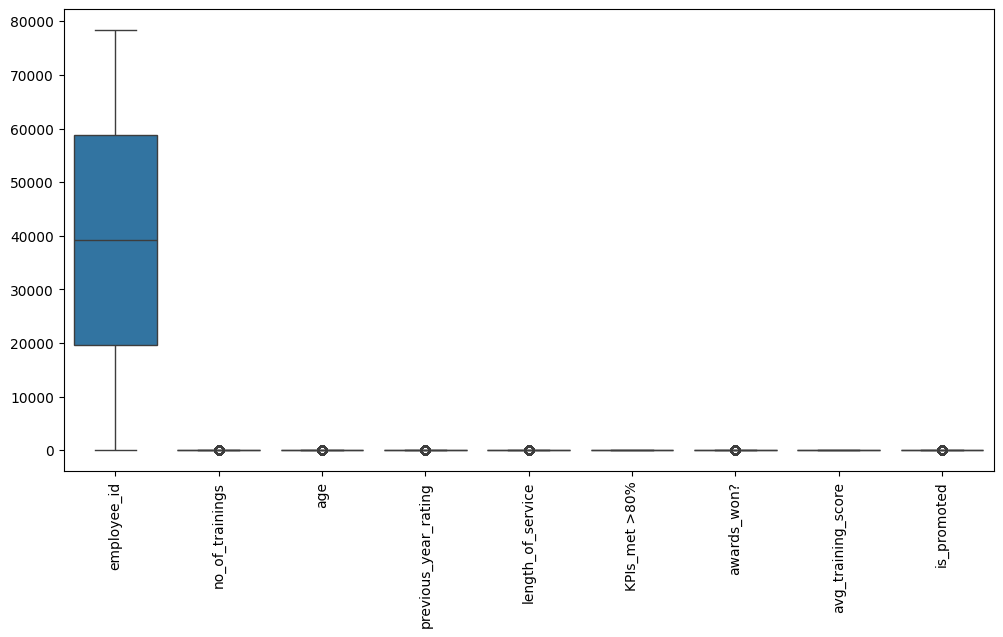

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset[num_cols])
plt.xticks(rotation=90)
plt.show()

encoding


In [15]:
dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [16]:
colns = ["department","region","education","gender","recruitment_channel"]

In [17]:
encode= pd.get_dummies(dataset, columns=colns, drop_first=True, dtype=int)

In [18]:
encode

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,1,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,0,...,0,0,0,0,0,0,0,1,0,1
54804,74592,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,0,0,1,0,0,0
54805,13918,1,27,5.0,3,1,0,79,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,13614,1,29,1.0,2,0,0,45,0,0,...,0,0,0,0,1,0,0,1,0,1


scaling

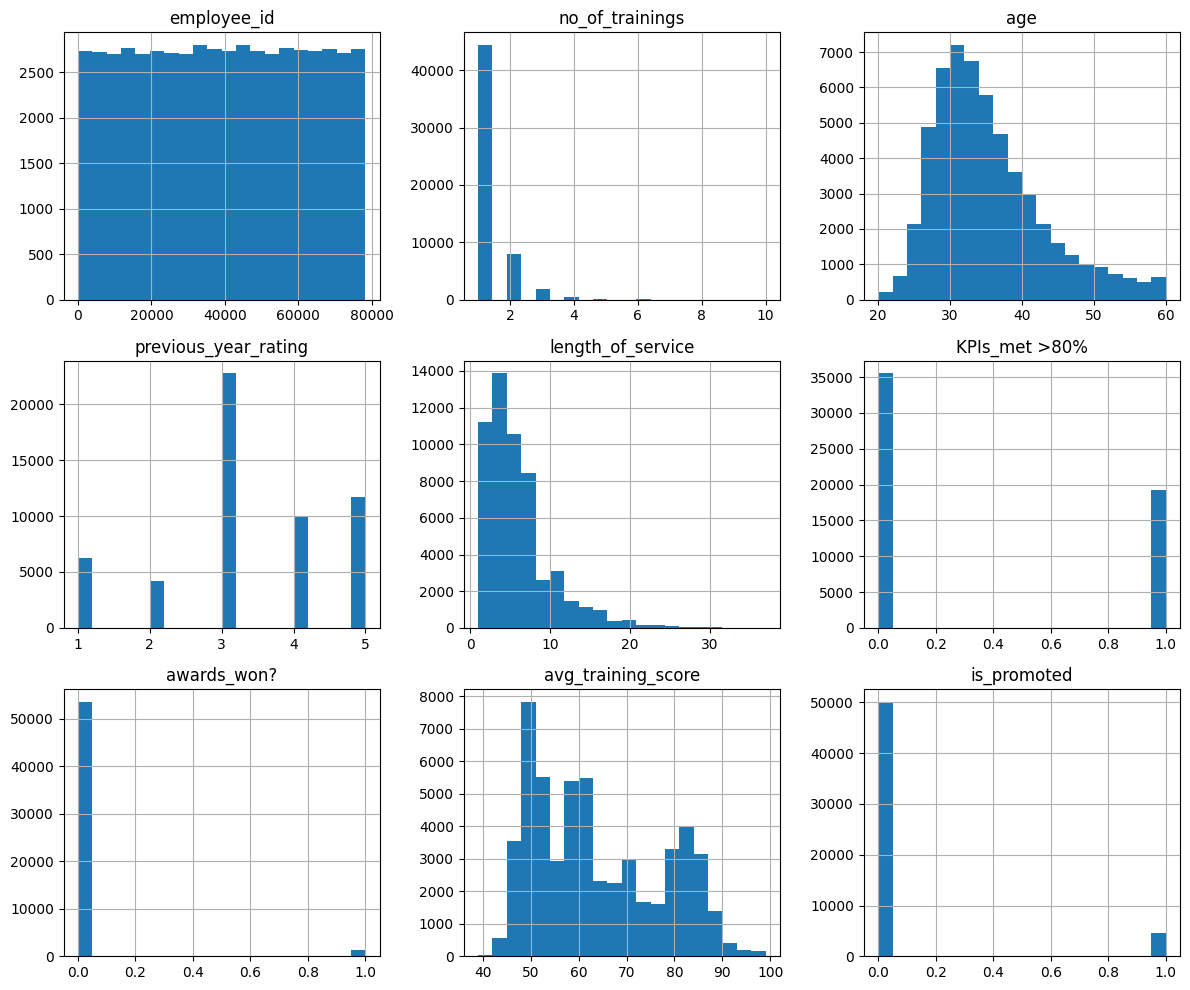

In [19]:
dataset.select_dtypes(include=["number"]).hist(figsize=(12,10),bins = 20)
plt.tight_layout()
plt.show()

In [20]:
y = dataset['is_promoted']
X = dataset.drop(['is_promoted'], axis=1)


In [21]:
X = X.drop('employee_id', axis=1)


In [22]:
X = pd.get_dummies(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [25]:
dataset[num_cols]

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,35,5.0,8,1,0,49
1,1,30,5.0,4,0,0,60
2,1,34,3.0,7,0,0,50
3,2,39,1.0,10,0,0,50
4,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78
54804,1,37,2.0,6,0,0,56
54805,1,27,5.0,3,1,0,79
54806,1,29,1.0,2,0,0,45


In [26]:
X_train.shape

(43846, 58)

ml models

LogisticRegression

In [27]:
log_reg_model = LogisticRegression()
# training the model using taining features and training targets
log_reg_model.fit(X_train,y_train)
# predict using the model and test features
y_pred_log_reg = log_reg_model.predict(X_test)

acc_log_reg = accuracy_score(y_test,y_pred_log_reg)
prec_log_reg = precision_score(y_test,y_pred_log_reg)
Rec_log_reg = recall_score(y_test,y_pred_log_reg)
f1_log_reg = f1_score(y_test,y_pred_log_reg)

print("the accuracy of logistic regression model is :",acc_log_reg)
print("the precision of logistic regression model is :",prec_log_reg)
print("the recall of logistic regression model is :",Rec_log_reg)
print("the f1 of logistic regression model is :",f1_log_reg)
confusion_matrix(y_test,y_pred_log_reg)

the accuracy of logistic regression model is : 0.9312169312169312
the precision of logistic regression model is : 0.8488372093023255
the recall of logistic regression model is : 0.23447537473233404
the f1 of logistic regression model is : 0.3674496644295302


array([[9989,   39],
       [ 715,  219]])

In [28]:
acc_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
#intialization the classifier for iteration
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p=2)

#training the ML model
  classifier.fit(X_train,y_train)

#predict using the trained ML model
  y_pred = classifier.predict(X_test)

#evaluate the ML model
  acc = accuracy_score(y_test,y_pred)

#populate acc_list with accuracy achived for each value of 'k'
  acc_list.append(acc)

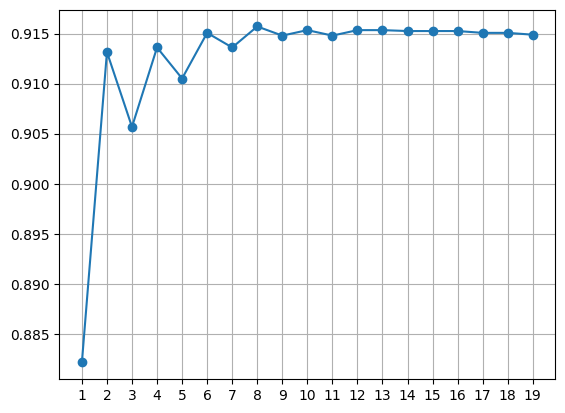

In [29]:
plt.plot(neighbors_range,acc_list,'o-')
plt.xlabel ='no of neighors (k)'
plt.ylabel = 'accuracy score'
plt.xticks(neighbors_range)
#plt.show()
plt.grid()

k-nn

In [30]:
KNN_classifier = KNeighborsClassifier(n_neighbors= 6,metric='euclidean')
KNN_classifier.fit(X_train,y_train)
#predict using the trained ML model
y_pred_knn = KNN_classifier.predict(X_test)
#evaluate the ML model
acc_knn = accuracy_score(y_test,y_pred_knn)
prec_knn = precision_score(y_test,y_pred_knn)
Rec_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

print("the accuracy of kneighors model is :",acc_knn)
print("the precision of kneighors model is :",prec_knn)
print("the recall of kneighors model is :",Rec_knn)
print("the f1 of kneighors model is :",f1_knn)
confusion_matrix(y_test,y_pred_knn)


the accuracy of kneighors model is : 0.9150702426564495
the precision of kneighors model is : 0.5254237288135594
the recall of kneighors model is : 0.033190578158458245
the f1 of kneighors model is : 0.06243705941591138


array([[10000,    28],
       [  903,    31]])

naive bayes

In [31]:
nb = GaussianNB()
#training the ML model
nb.fit(X_train,y_train)
#predict using the trained ML model
y_pred_NB = nb.predict(X_test)
#evaluate the ML model
acc_nb = accuracy_score(y_test,y_pred_NB)
prec_nb = precision_score(y_test,y_pred_NB)
Rec_nb = recall_score(y_test,y_pred_NB)
f1_nb = f1_score(y_test,y_pred_NB)

print("the accuracy of naive bayes model is :",acc_nb)
print("the precision of naive bayes  model is :",prec_nb)
print("the recall of naive bayes  model is :",Rec_nb)
print("the f1 of naive bayes model is :",f1_nb)
confusion_matrix(y_test,y_pred_NB)

the accuracy of naive bayes model is : 0.5933223864258347
the precision of naive bayes  model is : 0.14418416801292408
the recall of naive bayes  model is : 0.7644539614561028
the f1 of naive bayes model is : 0.24260958205912334


array([[5790, 4238],
       [ 220,  714]])

DecisionTree

In [32]:
dt = DecisionTreeClassifier()
#training the ML model
dt.fit(X_train,y_train)
#predict using the trained ML model
y_pred_DT = dt.predict(X_test)
#evaluate the ML model
acc_dt = accuracy_score(y_test,y_pred_DT)
prec_dt = precision_score(y_test,y_pred_DT)
Rec_dt = recall_score(y_test,y_pred_DT)
f1_dt = f1_score(y_test,y_pred_DT)

print("the accuracy of decision classifier model is :",acc_dt)
print("the precision of decision classifier  model is :",prec_dt)
print("the recall of decision classifier  model is :",Rec_dt)
print("the f1 of ndecision classifier model is :",f1_dt)
confusion_matrix(y_test,y_pred_DT)

the accuracy of decision classifier model is : 0.9027549717204889
the precision of decision classifier  model is : 0.4329268292682927
the recall of decision classifier  model is : 0.45610278372591007
the f1 of ndecision classifier model is : 0.44421272158498437


array([[9470,  558],
       [ 508,  426]])

In [33]:
svm = SVC()
#training the ML model
svm.fit(X_train, y_train)
#predict using the trained ML model
y_pred_svm = svm.predict(X_test)
#evaluate the ML model
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("the accuracy of svm model is :",acc_svm)
print("the precision of svm  model is :",prec_svm)
print("the recall of svm  model is :",rec_svm)
print("the f1 of svm model is :",f1_svm)
confusion_matrix(y_test,y_pred_svm)

the accuracy of svm model is : 0.9284802043422733
the precision of svm  model is : 0.9807692307692307
the recall of svm  model is : 0.16381156316916487
the f1 of svm model is : 0.28073394495412846


array([[10025,     3],
       [  781,   153]])

In [35]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearch
grid_knn = GridSearchCV(
    knn,
    params,
    cv=3,
    scoring='f1'
)
grid_knn.fit(X_train, y_train)

# Best tuned KNN model
best_knn = grid_knn.best_estimator_

load test data

In [36]:
testing = pd.read_csv("/content/test_2umaH9m.csv")
testing

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [38]:
test_employee_id = testing['employee_id']


In [39]:
test_df = testing.drop('employee_id', axis=1)


In [45]:
test_df = pd.get_dummies(test_df)


In [46]:
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)


In [49]:
test_df = test_df.fillna(test_df.median())

In [50]:
test_df = test_df.fillna(test_df.mode().iloc[0])


In [51]:
test_prob = best_knn.predict_proba(test_df)[:, 1]
test_pred = (test_prob > 0.35).astype(int)



In [52]:
submission = pd.DataFrame({
    'employee_id': test_employee_id,
    'is_promoted': test_pred
})

submission

In [55]:
sample_sub = pd.read_csv('/content/sample_submission_M0L0uXE.csv')
sample_sub.head()


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [56]:
sample_sub.to_csv('final_submission.csv', index=False)